### Aliado ou Oposição

In [88]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from io import StringIO
import os


In [34]:
url_11_14 = "https://pt.wikipedia.org/wiki/Lista_de_deputados_federais_do_Brasil_da_54.%C2%AA_legislatura"
url_15_18 = "https://pt.wikipedia.org/wiki/Lista_de_deputados_federais_do_Brasil_da_55.%C2%AA_legislatura"
url_19_22 = "https://pt.wikipedia.org/wiki/Lista_de_deputados_federais_do_Brasil_da_56.%C2%AA_legislatura"
url_23_24 = "https://pt.wikipedia.org/wiki/Lista_de_deputados_federais_do_Brasil_da_57.%C2%AA_legislatura"


In [85]:
def get_table(url, periodo=None):
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')
    tables = soup.find_all('table', {'class': 'wikitable'})

    if periodo == "23_24":
        table = tables[1]
    elif periodo == "19_22":
        table = tables[3]
    else:
        table = tables[0]
    dfs = pd.read_html(StringIO(str(table)))
    df = dfs[0]  


    colunas_para_remover = ["Bancada", "Número de deputados", "Número de deputados[6]","Líder", "Líder[3]", "Nível", "Ref"]
    colunas_existentes = [col for col in colunas_para_remover if col in df.columns]
    df.drop(columns=colunas_existentes, inplace=True)

    df['Aliado'] = df["Posição"].apply(lambda x: 1 if x == "Governo" else 0)
    df['Oposição'] = df["Posição"].apply(lambda x: 1 if x == "Oposição" else 0)
    df.drop(columns=["Posição"], inplace=True)
    
    return df


In [86]:
df_11_14 = get_table(url_11_14)
df_15_18 = get_table(url_11_14)
df_19_22 = get_table(url_19_22, periodo="19_22")
df_23_24 = get_table(url_23_24, periodo="23_24")

In [89]:
if not os.path.exists("data/posicoes"):
    os.makedirs("data/posicoes")
    print("Criando pasta data/posicoes")

Criando pasta data/posicoes


In [90]:
df_11_14.to_csv("data/posicoes/posicoes_11_14.csv", index=False)
df_15_18.to_csv("data/posicoes/posicoes_15_18.csv", index=False)
df_19_22.to_csv("data/posicoes/posicoes_19_22.csv", index=False)
df_23_24.to_csv("data/posicoes/posicoes_23_24.csv", index=False)
print("Arquivos salvos com sucesso!")

Arquivos salvos com sucesso!


### Influência dos Partidos na Bancada (ao longo dos anos)

Site de referência:
- (Camara Leg | Bancada)[https://www.camara.leg.br/internet/deputado/bancada.asp]

Ferramenta para recuperação de Versões Anteriores:
- (Web Archive)[https://web.archive.org/]

2013 - 2015:
- Onde era PRB se tornou REPUBLICANOS;

2013 - 2020:
- PL e PR foram unificados

2018 - 2019:
- PPS entrou como CIDADANIA

2019:
- PR se tornou PL

In [ ]:
partidos_cadeiras_2013 = [
    {'partido': 'PT', 'cadeiras': 88},
    {'partido': 'PMDB', 'cadeiras': 76},
    {'partido': 'PSDB', 'cadeiras': 46},
    {'partido': 'PP', 'cadeiras': 41},
    {'partido': 'PSD', 'cadeiras': 40},
    {'partido': 'Bloco PR, PTdoB, PRP', 'cadeiras': 38},
    {'partido': 'DEM', 'cadeiras': 25},
    {'partido': 'PSB', 'cadeiras': 25},
    {'partido': 'SDD', 'cadeiras': 23},
    {'partido': 'PROS', 'cadeiras': 17},
    {'partido': 'PDT', 'cadeiras': 17},
    {'partido': 'PTB', 'cadeiras': 17},
    {'partido': 'PCdoB', 'cadeiras': 14},
    {'partido': 'PSC', 'cadeiras': 13},
    {'partido': 'REPUBLICANOS', 'cadeiras': 10},
    {'partido': 'PV', 'cadeiras': 9},
    {'partido': 'PPS', 'cadeiras': 8},
    {'partido': 'PSOL', 'cadeiras': 3},
    {'partido': 'PMN', 'cadeiras': 3}
]

partidos_cadeiras_2014 = [
    {'partido': 'PT', 'cadeiras': 87},
    {'partido': 'PMDB', 'cadeiras': 75},
    {'partido': 'Bloco PP, PROS', 'cadeiras': 59},
    {'partido': 'PSDB', 'cadeiras': 45},
    {'partido': 'PSD', 'cadeiras': 42},
    {'partido': 'Bloco PR, PTdoB, PRP', 'cadeiras': 36},
    {'partido': 'DEM', 'cadeiras': 26},
    {'partido': 'PSB', 'cadeiras': 23},
    {'partido': 'SD', 'cadeiras': 22},
    {'partido': 'PDT', 'cadeiras': 18},
    {'partido': 'PTB', 'cadeiras': 18},
    {'partido': 'PCdoB', 'cadeiras': 14},
    {'partido': 'PSC', 'cadeiras': 13},
    {'partido': 'REPUBLICANOS', 'cadeiras': 10},
    {'partido': 'PV', 'cadeiras': 9},
    {'partido': 'PPS', 'cadeiras': 8},
    {'partido': 'PSOL', 'cadeiras': 3},
    {'partido': 'PMN', 'cadeiras': 3}
]

partidos_cadeiras_2015 = [
    {'partido': 'Bloco PMDB, PP, PTB, PSC, PHS, PEN', 'cadeiras': 151},
    {'partido': 'PT', 'cadeiras': 64},
    {'partido': 'PSDB', 'cadeiras': 53},
    {'partido': 'Bloco REPUBLICANOS, PTN, PMN, PRP, PSDC, PRTB, PTC, PSL, PTdoB', 'cadeiras': 38},
    {'partido': 'PSD', 'cadeiras': 34},
    {'partido': 'PR', 'cadeiras': 34},
    {'partido': 'PSB', 'cadeiras': 32},
    {'partido': 'DEM', 'cadeiras': 22},
    {'partido': 'PDT', 'cadeiras': 20},
    {'partido': 'SD', 'cadeiras': 16},
    {'partido': 'PCdoB', 'cadeiras': 13},
    {'partido': 'PROS', 'cadeiras': 12},
    {'partido': 'PPS', 'cadeiras': 11},
    {'partido': 'PV', 'cadeiras': 8},
    {'partido': 'PSOL', 'cadeiras': 5}
]

partidos_cadeiras_2016 = [
    {'partido': 'Bloco PP, PTB, PSC', 'cadeiras': 74},
    {'partido': 'Bloco PMDB, PEN', 'cadeiras': 69},
    {'partido': 'PT', 'cadeiras': 58},
    {'partido': 'PSDB', 'cadeiras': 48},
    {'partido': 'PR', 'cadeiras': 41},
    {'partido': 'PSD', 'cadeiras': 37},
    {'partido': 'PSB', 'cadeiras': 33},
    {'partido': 'DEM', 'cadeiras': 28},
    {'partido': 'REPUBLICANOS', 'cadeiras': 22},
    {'partido': 'PDT', 'cadeiras': 20},
    {'partido': 'Bloco PTN, PTdoB, PSL', 'cadeiras': 19},
    {'partido': 'SD', 'cadeiras': 14},
    {'partido': 'PCdoB', 'cadeiras': 11},
    {'partido': 'PPS', 'cadeiras': 8},
    {'partido': 'PHS', 'cadeiras': 7},
    {'partido': 'PROS', 'cadeiras': 6},
    {'partido': 'PSOL', 'cadeiras': 6},
    {'partido': 'PV', 'cadeiras': 6},
    {'partido': 'REDE', 'cadeiras': 4},
    {'partido': 'PMB', 'cadeiras': 1},
    {'partido': 'PRP', 'cadeiras': 1}
]

partidos_cadeiras_2017 = [
    {'partido': 'S.PART.', 'cadeiras': 3},
    {'partido': 'PMDB', 'cadeiras': 60},
    {'partido': 'PT', 'cadeiras': 57},
    {'partido': 'Bloco PP, AVANTE', 'cadeiras': 52},
    {'partido': 'PSDB', 'cadeiras': 47},
    {'partido': 'PSD', 'cadeiras': 38},
    {'partido': 'PR', 'cadeiras': 37},
    {'partido': 'PSB', 'cadeiras': 32},
    {'partido': 'DEM', 'cadeiras': 30},
    {'partido': 'Bloco PTB, PROS, PSL, PRP', 'cadeiras': 25},
    {'partido': 'REPUBLICANOS', 'cadeiras': 22},
    {'partido': 'PDT', 'cadeiras': 21},
    {'partido': 'PODE', 'cadeiras': 16},
    {'partido': 'SD', 'cadeiras': 14},
    {'partido': 'PCdoB', 'cadeiras': 12},
    {'partido': 'PSC', 'cadeiras': 11},
    {'partido': 'PPS', 'cadeiras': 9},
    {'partido': 'PHS', 'cadeiras': 7},
    {'partido': 'PV', 'cadeiras': 6},
    {'partido': 'PSOL', 'cadeiras': 6},
    {'partido': 'REDE', 'cadeiras': 4},
    {'partido': 'PEN', 'cadeiras': 3}
]

partidos_cadeiras_2018 = [
    {'partido': 'PT', 'cadeiras': 60},
    {'partido': 'PP', 'cadeiras': 49},
    {'partido': 'AVANTE', 'cadeiras': 5},
    {'partido': 'PMDB', 'cadeiras': 52},
    {'partido': 'PSDB', 'cadeiras': 48},
    {'partido': 'DEM', 'cadeiras': 42},
    {'partido': 'PR', 'cadeiras': 41},
    {'partido': 'PSD', 'cadeiras': 37},
    {'partido': 'PSB', 'cadeiras': 26},
    {'partido': 'PTB', 'cadeiras': 15},
    {'partido': 'PROS', 'cadeiras': 11},
    {'partido': 'REPUBLICANOS', 'cadeiras': 21},
    {'partido': 'PDT', 'cadeiras': 21},
    {'partido': 'PODE', 'cadeiras': 17},
    {'partido': 'PCdoB', 'cadeiras': 11},
    {'partido': 'SD', 'cadeiras': 10},
    {'partido': 'PSC', 'cadeiras': 9},
    {'partido': 'PSL', 'cadeiras': 8},
    {'partido': 'PPS', 'cadeiras': 8},
    {'partido': 'PSOL', 'cadeiras': 6},
    {'partido': 'PATRIOTA', 'cadeiras': 5},
    {'partido': 'PV', 'cadeiras': 4},
    {'partido': 'PHS', 'cadeiras': 4},
    {'partido': 'PPL', 'cadeiras': 1}
]

partidos_cadeiras_2019 = [
    {'partido': 'Sem Partido', 'cadeiras': 1},
    {'partido': 'PP', 'cadeiras': 39},
    {'partido': 'PMDB', 'cadeiras': 34},
    {'partido': 'PTB', 'cadeiras': 11},
    {'partido': 'PT', 'cadeiras': 55},
    {'partido': 'PSL', 'cadeiras': 54},
    {'partido': 'PR', 'cadeiras': 38},
    {'partido': 'PSD', 'cadeiras': 36},
    {'partido': 'PDT', 'cadeiras': 28},
    {'partido': 'AVANTE', 'cadeiras': 7},
    {'partido': 'PSB', 'cadeiras': 32},
    {'partido': 'REPUBLICANOS', 'cadeiras': 31},
    {'partido': 'PSDB', 'cadeiras': 30},
    {'partido': 'DEM', 'cadeiras': 27},
    {'partido': 'SOLIDARIEDADE', 'cadeiras': 14},
    {'partido': 'PODE', 'cadeiras': 11},
    {'partido': 'PSOL', 'cadeiras': 10},
    {'partido': 'PROS', 'cadeiras': 10},
    {'partido': 'PCdoB', 'cadeiras': 8},
    {'partido': 'PSC', 'cadeiras': 8},
    {'partido': 'CIDADANIA', 'cadeiras': 8},
    {'partido': 'NOVO', 'cadeiras': 8},
    {'partido': 'PATRIOTA', 'cadeiras': 4},
    {'partido': 'PV', 'cadeiras': 4},
    {'partido': 'PMN', 'cadeiras': 2},
    {'partido': 'PHS', 'cadeiras': 1},
    {'partido': 'PRP', 'cadeiras': 1},
    {'partido': 'REDE', 'cadeiras': 1}
]

partidos_cadeiras_2020 = [
    {'partido': 'PL', 'cadeiras': 41},
    {'partido': 'PP', 'cadeiras': 41},
    {'partido': 'PSD', 'cadeiras': 34},
    {'partido': 'SOLIDARIEDADE', 'cadeiras': 13},
    {'partido': 'AVANTE', 'cadeiras': 8},
    {'partido': 'PSL', 'cadeiras': 53},
    {'partido': 'PROS', 'cadeiras': 10},
    {'partido': 'PTB', 'cadeiras': 11},
    {'partido': 'PT', 'cadeiras': 54},
    {'partido': 'PMDB', 'cadeiras': 34},
    {'partido': 'REPUBLICANOS', 'cadeiras': 31},
    {'partido': 'PSDB', 'cadeiras': 31},
    {'partido': 'PSB', 'cadeiras': 31},
    {'partido': 'PDT', 'cadeiras': 28},
    {'partido': 'DEM', 'cadeiras': 28},
    {'partido': 'PODE', 'cadeiras': 10},
    {'partido': 'PSOL', 'cadeiras': 10},
    {'partido': 'PSC', 'cadeiras': 9},
    {'partido': 'PCdoB', 'cadeiras': 9},
    {'partido': 'CIDADANIA', 'cadeiras': 8},
    {'partido': 'NOVO', 'cadeiras': 8},
    {'partido': 'PATRIOTA', 'cadeiras': 6},
    {'partido': 'PV', 'cadeiras': 4},
    {'partido': 'REDE', 'cadeiras': 1}
]

partidos_cadeiras_2021 = [
    {'partido': 'PSL', 'cadeiras': 55},
    {'partido': 'PT', 'cadeiras': 53},
    {'partido': 'PL', 'cadeiras': 43},
    {'partido': 'PP', 'cadeiras': 42},
    {'partido': 'PSD', 'cadeiras': 35},
    {'partido': 'PMDB', 'cadeiras': 34},
    {'partido': 'PSDB', 'cadeiras': 32},
    {'partido': 'REPUBLICANOS', 'cadeiras': 31},
    {'partido': 'PSB', 'cadeiras': 30},
    {'partido': 'DEM', 'cadeiras': 27},
    {'partido': 'PDT', 'cadeiras': 24},
    {'partido': 'PSC', 'cadeiras': 12},
    {'partido': 'PTB', 'cadeiras': 10},
    {'partido': 'SOLIDARIEDADE', 'cadeiras': 13},
    {'partido': 'PODE', 'cadeiras': 11},
    {'partido': 'PROS', 'cadeiras': 10},
    {'partido': 'PSOL', 'cadeiras': 9},
    {'partido': 'NOVO', 'cadeiras': 8},
    {'partido': 'AVANTE', 'cadeiras': 8},
    {'partido': 'PCdoB', 'cadeiras': 8},
    {'partido': 'CIDADANIA', 'cadeiras': 7},
    {'partido': 'PATRIOTA', 'cadeiras': 6},
    {'partido': 'PV', 'cadeiras': 4},
    {'partido': 'REDE', 'cadeiras': 1}
]

partidos_cadeiras_2022 = [
    {'partido': 'S.PART.', 'cadeiras': 1},
    {'partido': 'PL', 'cadeiras': 76},
    {'partido': 'PP', 'cadeiras': 58},
    {'partido': 'PT', 'cadeiras': 56},
    {'partido': 'UNIÃO', 'cadeiras': 50},
    {'partido': 'PSD', 'cadeiras': 46},
    {'partido': 'REPUBLICANOS', 'cadeiras': 45},
    {'partido': 'PMDB', 'cadeiras': 37},
    {'partido': 'PSB', 'cadeiras': 23},
    {'partido': 'PSDB', 'cadeiras': 22},
    {'partido': 'PDT', 'cadeiras': 19},
    {'partido': 'PODE', 'cadeiras': 9},
    {'partido': 'PSC', 'cadeiras': 8},
    {'partido': 'PSOL', 'cadeiras': 8},
    {'partido': 'NOVO', 'cadeiras': 8},
    {'partido': 'PCdoB', 'cadeiras': 8},
    {'partido': 'SOLIDARIEDADE', 'cadeiras': 8},
    {'partido': 'CIDADANIA', 'cadeiras': 7},
    {'partido': 'AVANTE', 'cadeiras': 6},
    {'partido': 'PATRIOTA', 'cadeiras': 5},
    {'partido': 'PROS', 'cadeiras': 4},
    {'partido': 'PV', 'cadeiras': 4},
    {'partido': 'PTB', 'cadeiras': 3},
    {'partido': 'REDE', 'cadeiras': 2}
]

partidos_cadeiras_2023 = [
    {'partido': 'UNIÃO', 'cadeiras': 59},
    {'partido': 'PP', 'cadeiras': 49},
    {'partido': 'PDT', 'cadeiras': 18},
    {'partido': 'Federação PSDB CIDADANIA', 'cadeiras': 18},    
    {'partido': 'PSB', 'cadeiras': 15},
    {'partido': 'AVANTE', 'cadeiras': 7},
    {'partido': 'SOLIDARIEDADE', 'cadeiras': 4},
    {'partido': 'PATRIOTA', 'cadeiras': 4},    
    {'partido': 'PMDB', 'cadeiras': 43},
    {'partido': 'PSD', 'cadeiras': 43},
    {'partido': 'REPUBLICANOS', 'cadeiras': 41},
    {'partido': 'PODE', 'cadeiras': 11},
    {'partido': 'PSC', 'cadeiras': 3},
    {'partido': 'PL', 'cadeiras': 99},
    {'partido': 'PT', 'cadeiras': 68},
    {'partido': 'PCdoB', 'cadeiras': 7},
    {'partido': 'PV', 'cadeiras': 6},
    {'partido': 'PSOL', 'cadeiras': 13},
    {'partido': 'REDE', 'cadeiras': 1},
    {'partido': 'NOVO', 'cadeiras': 3}
]

partidos_cadeiras_2024 = [

    {'partido': 'S.PART.', 'cadeiras': 1},
    {'partido': 'UNIÃO', 'cadeiras': 58},
    {'partido': 'PP', 'cadeiras': 50},
    {'partido': 'PDT', 'cadeiras': 18},
    {'partido': 'Federação PSDB CIDADANIA', 'cadeiras': 17},
    {'partido': 'AVANTE', 'cadeiras': 7},
    {'partido': 'PRD', 'cadeiras': 4},
    {'partido': 'SOLIDARIEDADE', 'cadeiras': 6},
    {'partido': 'PMDB', 'cadeiras': 44},
    {'partido': 'PSD', 'cadeiras': 44},
    {'partido': 'REPUBLICANOS', 'cadeiras': 43},
    {'partido': 'PODE', 'cadeiras': 15},
    {'partido': 'PL', 'cadeiras': 95},
    {'partido': 'PT', 'cadeiras': 68},
    {'partido': 'PCdoB', 'cadeiras': 7},
    {'partido': 'PV', 'cadeiras': 5},
    {'partido': 'PSB', 'cadeiras': 14},
    {'partido': 'NOVO', 'cadeiras': 3},
    {'partido': 'PSOL', 'cadeiras': 13},
    {'partido': 'REDE', 'cadeiras': 1}

]


- Verificando Contagem

In [ ]:
def soma_cadeiras(partidos_cadeiras):
    return sum(partido['cadeiras'] for partido in partidos_cadeiras)

total_cadeiras_2013 = soma_cadeiras(partidos_cadeiras_2013)
total_cadeiras_2014 = soma_cadeiras(partidos_cadeiras_2014)
total_cadeiras_2015 = soma_cadeiras(partidos_cadeiras_2015)
total_cadeiras_2016 = soma_cadeiras(partidos_cadeiras_2016)
total_cadeiras_2017 = soma_cadeiras(partidos_cadeiras_2017)
total_cadeiras_2018 = soma_cadeiras(partidos_cadeiras_2018)
total_cadeiras_2019 = soma_cadeiras(partidos_cadeiras_2019)
total_cadeiras_2020 = soma_cadeiras(partidos_cadeiras_2020)
total_cadeiras_2021 = soma_cadeiras(partidos_cadeiras_2021)
total_cadeiras_2022 = soma_cadeiras(partidos_cadeiras_2022)
total_cadeiras_2023 = soma_cadeiras(partidos_cadeiras_2023)
total_cadeiras_2024 = soma_cadeiras(partidos_cadeiras_2024)

print("Total de cadeiras em 2013:", total_cadeiras_2013)
print("Total de cadeiras em 2014:", total_cadeiras_2014)
print("Total de cadeiras em 2015:", total_cadeiras_2015)
print("Total de cadeiras em 2016:", total_cadeiras_2016)
print("Total de cadeiras em 2017:", total_cadeiras_2017)
print("Total de cadeiras em 2018:", total_cadeiras_2018)
print("Total de cadeiras em 2019:", total_cadeiras_2019)
print("Total de cadeiras em 2020:", total_cadeiras_2020)
print("Total de cadeiras em 2021:", total_cadeiras_2021)
print("Total de cadeiras em 2022:", total_cadeiras_2022)
print("Total de cadeiras em 2023:", total_cadeiras_2023)
print("Total de cadeiras em 2024:", total_cadeiras_2024)

- Calculando Influência

In [ ]:
def influencia_partido(partidos_cadeiras, total_cadeiras):
    for partido in partidos_cadeiras:
        partido['influencia'] = partido['cadeiras'] / total_cadeiras
    return partidos_cadeiras

partidos_cadeiras_2013 = influencia_partido(partidos_cadeiras_2013, total_cadeiras_2013)
partidos_cadeiras_2014 = influencia_partido(partidos_cadeiras_2014, total_cadeiras_2014)
partidos_cadeiras_2015 = influencia_partido(partidos_cadeiras_2015, total_cadeiras_2015)
partidos_cadeiras_2016 = influencia_partido(partidos_cadeiras_2016, total_cadeiras_2016)
partidos_cadeiras_2017 = influencia_partido(partidos_cadeiras_2017, total_cadeiras_2017)
partidos_cadeiras_2018 = influencia_partido(partidos_cadeiras_2018, total_cadeiras_2018)
partidos_cadeiras_2019 = influencia_partido(partidos_cadeiras_2019, total_cadeiras_2019)
partidos_cadeiras_2020 = influencia_partido(partidos_cadeiras_2020, total_cadeiras_2020)
partidos_cadeiras_2021 = influencia_partido(partidos_cadeiras_2021, total_cadeiras_2021)
partidos_cadeiras_2022 = influencia_partido(partidos_cadeiras_2022, total_cadeiras_2022)
partidos_cadeiras_2023 = influencia_partido(partidos_cadeiras_2023, total_cadeiras_2023)
partidos_cadeiras_2024 = influencia_partido(partidos_cadeiras_2024, total_cadeiras_2024)

partidos_cadeiras_2013

- Dividindo os Partidos Blocados (apenas os que o gov não explicitou a quantidade de cadeiras individual)

In [ ]:
def dividir_blocos(partidos_cadeiras):
    partidos_divididos = []
    for partido in partidos_cadeiras:
        if 'Bloco' in partido['partido']:
            blocos = partido['partido'].replace('Bloco ', '').split(', ')
            num_blocos = len(blocos)
            for bloco in blocos:
                partidos_divididos.append({
                    'partido': bloco,
                    'cadeiras': partido['cadeiras'] / num_blocos,
                    'influencia': partido['influencia'] / num_blocos
                })
        else:
            partidos_divididos.append(partido)
    return partidos_divididos

partidos_cadeiras_2013 = dividir_blocos(partidos_cadeiras_2013)
partidos_cadeiras_2014 = dividir_blocos(partidos_cadeiras_2014)
partidos_cadeiras_2015 = dividir_blocos(partidos_cadeiras_2015)
partidos_cadeiras_2016 = dividir_blocos(partidos_cadeiras_2016)
partidos_cadeiras_2017 = dividir_blocos(partidos_cadeiras_2017)
partidos_cadeiras_2018 = dividir_blocos(partidos_cadeiras_2018)
partidos_cadeiras_2019 = dividir_blocos(partidos_cadeiras_2019)
partidos_cadeiras_2020 = dividir_blocos(partidos_cadeiras_2020)
partidos_cadeiras_2021 = dividir_blocos(partidos_cadeiras_2021)
partidos_cadeiras_2022 = dividir_blocos(partidos_cadeiras_2022)
partidos_cadeiras_2023 = dividir_blocos(partidos_cadeiras_2023)
partidos_cadeiras_2024 = dividir_blocos(partidos_cadeiras_2024)

partidos_cadeiras_2013

- Fazendo o dataset Influência

In [ ]:
anos = list(range(2013, 2025))
dados_influencia = [
    partidos_cadeiras_2013, partidos_cadeiras_2014, partidos_cadeiras_2015,
    partidos_cadeiras_2016, partidos_cadeiras_2017, partidos_cadeiras_2018,
    partidos_cadeiras_2019, partidos_cadeiras_2020, partidos_cadeiras_2021, 
    partidos_cadeiras_2022, partidos_cadeiras_2023, partidos_cadeiras_2024
]

dados_influencia_flat = []
for ano, partidos in zip(anos, dados_influencia):
    for partido in partidos:
        partido['ano'] = ano
        dados_influencia_flat.append(partido)

df_influencia = pd.DataFrame(dados_influencia_flat)

df_influencia

- Mesclando

In [ ]:
df = pd.read_csv('data/transformed_dfs/Proposicoes_2013_2024.csv')


In [ ]:
df_influencia = df_influencia.rename(columns={'partido': 'partidoAutor'})
df_influencia

In [ ]:
#compatibilidade
print(df['partidoAutor'].dtype, df_influencia['partidoAutor'].dtype)
print(df['ano'].dtype, df_influencia['ano'].dtype)

In [ ]:
#ajuste
df['partidoAutor'] = df['partidoAutor'].str.strip()
df_influencia['partidoAutor'] = df_influencia['partidoAutor'].str.strip()
df['partidoAutor'] = df['partidoAutor'].str.upper()
df_influencia['partidoAutor'] = df_influencia['partidoAutor'].str.upper()

renomear_partidos = {
    'PC DO B': 'PCDOB',
    'SOLIDARI': 'SOLIDARIEDADE',
    'PRB': 'REPUBLICANOS',
    'REPUBLIC': 'REPUBLICANOS',
    'PATRI': 'PATRIOTA',
    'PODEMOS': 'PODE',
    'MDB': 'PMDB',
    #'PR': 'PL'
    #'PPS': 'CIDADANIA'
}    

df['partidoAutor'] = df['partidoAutor'].replace(renomear_partidos)

#caso do REDE e aliança com PSB
df.loc[1574, 'partidoAutor'] = 'PSB'

#caso do PPS que é o CIDADANIA
df.loc[5887, 'partidoAutor'] = 'CIDADANIA'
df.loc[5903, 'partidoAutor'] = 'CIDADANIA'

#caso do PR que é o PL, e vice versa
df.loc[5356, 'partidoAutor'] = 'PR'
df.loc[5518, 'partidoAutor'] = 'PR'

In [ ]:
df = df.merge(df_influencia[['partidoAutor', 'ano', 'influencia']], 
              on=['partidoAutor', 'ano'], how='left')

df

In [ ]:
df = df[~df['influencia'].isna()]
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df.to_csv('data/transformed_dfs/Proposicoes_2013_2024_Influencia.csv', index=False)
print("File Proposicoes_2013_2024_Influencia.csv saved")

### Presidente Camara

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from io import StringIO
import os

In [ ]:
url = "https://pt.wikipedia.org/wiki/Lista_de_presidentes_da_C%C3%A2mara_dos_Deputados_do_Brasil"
response = requests.get(url)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')
tables = soup.find_all('table', {'class': 'wikitable'})

In [ ]:
table = tables[1]
dfs = pd.read_html(StringIO(str(table)))
df = dfs[0]
df.head()

In [ ]:
df.columns = [' '.join(col).strip() for col in df.columns.values]

df.rename(columns={df.columns[3]: "DataInicial", 
                   df.columns[4]: "DataFinal",
                   df.columns[7]: "Partido"
                   }, inplace=True)

def custom_date_parser(date_str):
    months = {
        'janeiro': '01', 'fevereiro': '02', 'março': '03', 'abril': '04',
        'maio': '05', 'junho': '06', 'julho': '07', 'agosto': '08',
        'setembro': '09', 'outubro': '10', 'novembro': '11', 'dezembro': '12'
    }
    day, month_str, year = date_str.split(' de ')
    
    if '1' in day:
        day = '1'

    month = months[month_str]
    return f'{year}-{month}-{day}'

def extract_year(date_str):
    try:
        # Extrair a última palavra da string, que é o ano
        year = date_str.split()[-1]
        # Verificar se o ano é um número válido
        if year.isdigit():
            return int(year)
        else:
            return None
    except Exception as e:
        return None

In [ ]:
df['AnoInicial'] = df['DataInicial'].apply(extract_year)
df['AnoFinal'] = df['DataFinal'].apply(extract_year)

df = df[["DataInicial", "DataFinal", "AnoInicial", "AnoFinal",  "Partido"]]

df_filtered_anos = df[df['AnoFinal'] >=2013]

In [ ]:
df_filtered_anos.loc[:, "AnoInicial"] = df_filtered_anos["AnoInicial"].astype(int)
df_filtered_anos.loc[:, "AnoFinal"] = df_filtered_anos["AnoFinal"].astype(int)
df_filtered_anos.loc[:, "Partido"] = df_filtered_anos["Partido"].apply(lambda x: x.split()[-1])
print(df_filtered_anos)

In [ ]:
df_filtered_anos.loc[:, 'DataFinal'] = df_filtered_anos['DataFinal'].str.replace('1º', '1', regex=True).str.replace('Fevereiro', 'fevereiro')
df_filtered_anos.loc[:, 'DataInicial'] = df_filtered_anos['DataInicial'].str.replace('Fevereiro', 'fevereiro')
df_filtered_anos.loc[:, 'DataInicial'] = df_filtered_anos['DataInicial'].apply(custom_date_parser)
df_filtered_anos.loc[:, 'DataFinal'] = df_filtered_anos['DataFinal'].apply(custom_date_parser)

In [ ]:
df_filtered_anos.loc[:, 'DataInicial'] = pd.to_datetime(df_filtered_anos['DataInicial'], format='%Y-%m-%d', errors='coerce').dt.date
df_filtered_anos.loc[:, 'DataFinal'] = pd.to_datetime(df_filtered_anos['DataFinal'], format='%Y-%m-%d', errors='coerce').dt.date

In [ ]:
df_filtered_anos.to_csv('../data/presidentes_camara_deputados.csv', index=False)
print('Arquivo salvo com sucesso!')

### Ajustes

In [ ]:
ObterProposicoes = os.path.join('data', 'ObterProposicoes_2013_2024.csv')
df = pd.read_csv(ObterProposicoes)

duplicated_ids = df[df['idProposicao'].duplicated()]['idProposicao']

if duplicated_ids.any():
    df = df.drop_duplicates(subset='idProposicao')

df = df[["nomeProposicao", "idProposicao", "tema", "partidoAutor", "DataApresentacao", "Situacao"]]

- Agrupando temas em categorias

In [ ]:
direitos_justica = [
    'Direito Penal e Processual Penal', 'Direito e Justiça', 
    'Direito Civil e Processual Civil', 'Direito Constitucional', 
    'Direito e Defesa do Consumidor', 'Direitos Humanos e Minorias'
]

desenvolvimento_social_urbano = [
    'Cidades e Desenvolvimento Urbano', 'Saúde', 'Educação', 
    'Trabalho e Emprego', 'Arte, Cultura e Religião', 
    'Esporte e Lazer', 'Previdência e Assistência Social', 
    'Homenagens e Datas Comemorativas'
]

economia_desenvolvimento_sustentavel = [
    'Meio Ambiente e Desenvolvimento Sustentável', 'Economia', 
    'Indústria, Comércio e Serviços', 'Finanças Públicas e Orçamento', 
    'Agricultura, Pecuária, Pesca e Extrativismo', 'Estrutura Fundiária', 
    'Turismo', 'Relações Internacionais e Comércio Exterior', 
    'Energia, Recursos Hídricos e Minerais'
]

administracao_politicas_publicas = [
    'Administração Pública', 'Processo Legislativo e Atuação Parlamentar', 
    'Política, Partidos e Eleições', 'Defesa e Segurança', 
    'Comunicações', 'Viação, Transporte e Mobilidade', 
    'Ciência, Tecnologia e Inovação'
]

infraestrutura_gestao_recursos = [
    'Viação, Transporte e Mobilidade', 'Energia, Recursos Hídricos e Minerais', 
    'Estrutura Fundiária', 'Comunicações'
]

- Codificação binária categorizada (se baseando na ideia de One-Hot Encoding)

In [ ]:
for col in ['Administração e Políticas Públicas', 
            'Desenvolvimento Social e Urbano', 
            'Direitos e Justiça', 
            'Economia e Desenvolvimento Sustentável', 
            'Infraestrutura e Gestão de Recursos']:
    df.loc[:, col] = 0

def atualizar_colunas(row):
    for tema in direitos_justica:
        if tema in row['tema']:
            row['Direitos e Justiça'] = 1
    for tema in desenvolvimento_social_urbano:
        if tema in row['tema']:
            row['Desenvolvimento Social e Urbano'] = 1
    for tema in economia_desenvolvimento_sustentavel:
        if tema in row['tema']:
            row['Economia e Desenvolvimento Sustentável'] = 1
    for tema in administracao_politicas_publicas:
        if tema in row['tema']:
            row['Administração e Políticas Públicas'] = 1
    for tema in infraestrutura_gestao_recursos:
        if tema in row['tema']:
            row['Infraestrutura e Gestão de Recursos'] = 1
    return row

df = df.apply(atualizar_colunas, axis=1)

In [ ]:
#sem partido out
df = df[df['partidoAutor'].str.strip() != '']

df = df.drop('tema', axis=1)

df

In [ ]:
# @title Verificação de erro ortográfico

tranformada_lei = df['Situacao'].str.contains('tranformada', case=False, na=False).sum()
transformada_lei = df['Situacao'].str.contains('transformada', case=False, na=False).sum()

print(f"Total de situações 'transformadas em lei': {transformada_lei}")
print(f"Total de situações 'tranformadas em lei': {tranformada_lei}")

In [ ]:
df = df[df['Situacao'].str.contains('Arquivada', case=False, na=False) | df['Situacao'].str.contains('Tranformada', case=False, na=False)]

num_arquivada = df['Situacao'].str.contains('arquivada', case=False, na=False).sum()
transformada_lei = df['Situacao'].str.contains('tranformada', case=False, na=False).sum()

print(f"Total de situações 'transformadas em lei': {transformada_lei}")
print(f"Total de situações 'arquivada': {num_arquivada}")

df = df.rename(columns={"Situacao": "VirouLei"})

df.loc[:, 'VirouLei']  = df['VirouLei'].str.contains('tranformada', case=False, na=False).astype(int) 

In [ ]:
df['DataApresentacao'] = pd.to_datetime(df['DataApresentacao'], dayfirst=True)

df['ano'] = df['DataApresentacao'].dt.year

colunas = df.columns.tolist()
colunas.insert(4, colunas.pop(colunas.index('ano')))
colunas.insert(11, colunas.pop(colunas.index('VirouLei')))
df = df[colunas]
df.reset_index(drop=True, inplace=True)
df

In [ ]:
if not os.path.exists('data/transformed_dfs'):
    os.makedirs('data/transformed_dfs')
    print("Directory data/transformed_dfs created")
else:
    print("Directory data/transformed_dfs already exists")

df.to_csv('data/transformed_dfs/Proposicoes_2013_2024.csv', index=False)
print("File Proposicoes_2013_2024.csv saved")

### Visualização

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('data/proposicoes_ord_2013-2023.csv')

In [37]:
colunas = df.columns.tolist()

x_c = df[colunas[5:-3] + [colunas[-3]] + [colunas[-2]]]
x = df[colunas[5:-3] + [colunas[-3]]]
y = df[colunas[-2]]

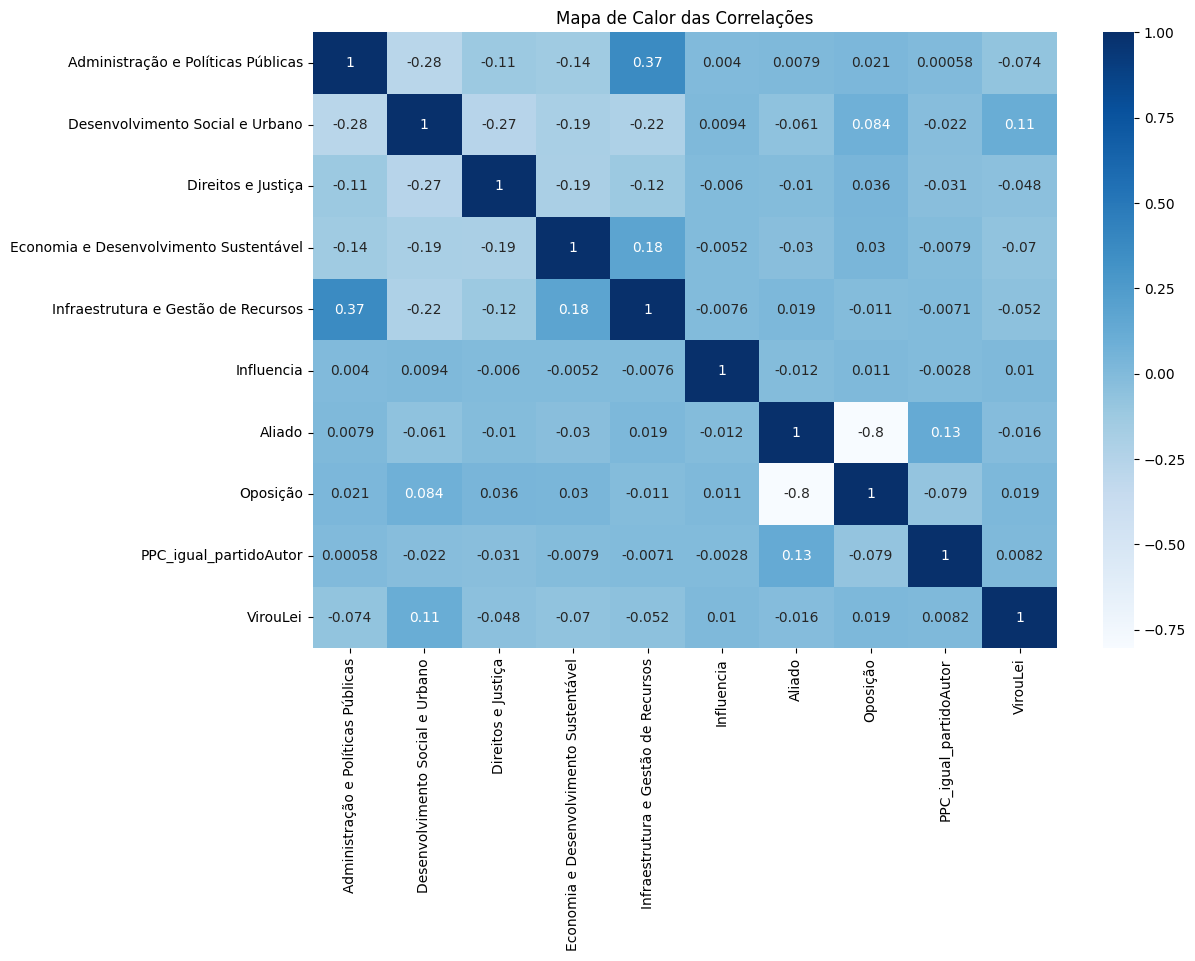

In [38]:
correlation_matrix = x_c.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', cbar=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

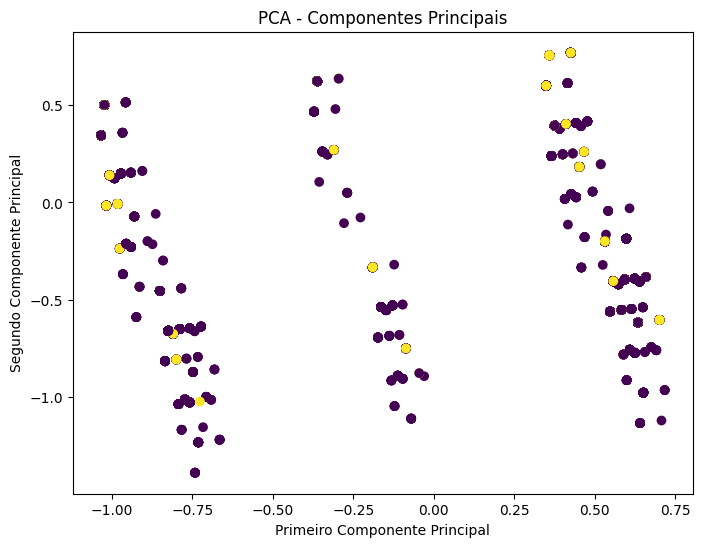

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)

principal_components

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y, cmap='viridis')
plt.title('PCA - Componentes Principais')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.show()

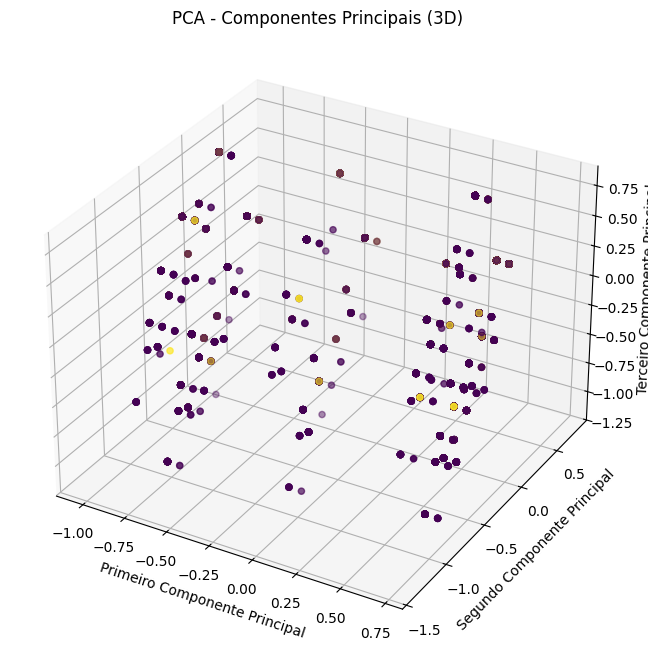

In [48]:
pca3 = PCA(n_components=3) 
principal_components = pca3.fit_transform(x)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c=y, cmap='viridis')
ax.set_title('PCA - Componentes Principais (3D)')
ax.set_xlabel('Primeiro Componente Principal')
ax.set_ylabel('Segundo Componente Principal')
ax.set_zlabel('Terceiro Componente Principal')
plt.show()